## 1. A review of statistical terms

### 1.1 Variance & Standard Deviation
Suppose we have a list of widgets. Without using library functions, what is the mean, variance, and standard deviation of this list?

In [35]:
# here's the list.
widgets=[451, 330, 570, 390, 410]

In [36]:
# which libraries should we import here?
import math
import numpy as np
import pandas as pd

In [37]:
# find the mean
total = sum(widgets)
mean_widgets = total/len(widgets)
print("mean widgets: ", mean_widgets)

mean widgets:  430.2


#### Variance

In [72]:
# first write a little function 
def subtract_mean(number):
    return number-mean_widgets

# Note: this can be converted to lambda for efficiency:
lambda x: x-mean_widgets

<function __main__.<lambda>(x)>

In [ ]:
# use `map` to apply that function to our list 
distances = list(map(subtract_mean, widgets))

In [ ]:
# square and sum all of those distances
squared_distances = list(map(lambda x: x**2, distances))

In [ ]:
# how long is our list?
list_length=len(squared_distances)-1 # for a sample taken from a population
list_length=len(squared_distances) # for a whole population (no sample)

In [ ]:
# calculate variance
variance_widgets = sum(squared_distances)/list_length
print('{:.2f}'.format(variance_widgets,3))

#### standard dev

In [54]:
# calculate the standard deviation
print('{:.2f}'.format(math.sqrt(variance_widgets)))
print('{:.2f}'.format(np.sqrt(variance_widgets)))

80.05
80.05


In [52]:
# check our work using numpy
print(np.mean(widgets))
print('{:.2f}'.format(np.var(widgets)))
print('{:.2f}'.format(np.std(widgets)))

430.2
6408.16
80.05


In [81]:
# check our work using pandas
df = pd.DataFrame({"widgets": widgets})
print('mean:', df['widgets'].mean())

mean: 430.2


In [76]:
# for a population
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=0)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=0)))

var: 6408.16
std: 80.05


In [77]:
# for a sample
print('var:', '{:.2f}'.format(df['widgets'].var(ddof=1)))
print('std:', '{:.2f}'.format(df['widgets'].std(ddof=1)))

var: 8010.20
std: 89.50


### 1.2 Covariance
Find the covariance between widgets and gadgets. You may use library functions this time.

In [58]:
# make a new list
gadgets = [410, 505, 371, 220, 625]

,widgets,gadgets
0,451,410
1,330,505
2,570,371
3,390,220
4,410,625


In [64]:
# using numpy
print('{:.2f}'.format(np.cov(widgets, gadgets)[0][1]))

-2919.05


In [71]:
# using pandas
df['gadgets'] = pd.Series(gadgets)
print('{:.2f}'.format(df.cov().values[0][1]))

-2919.05


### 1.3 Correlation Coefficient
Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [5]:
std_customers = standard_deviation(customers)
std_sales = standard_deviation(sales)

print(std_customers)
print(std_sales)

## Check our work
print("\n Check our work:")
print(df.customers.std())
print(df.sales.std())

#Calculate correlation
denom = std_customers*std_sales
print("std dev products:", denom)
corr_sales_customers = cov_sales_customers/denom

print("\n Correlation between sales and customers")
print(corr_sales_customers) 

## Check work
print('Check Work:', df['sales'].corr(df['customers']))

17.057326313123664
463.0204150595357

 Check our work:
17.057326313123664
463.0204150595357
std dev products: 7897.890309308459

 Correlation between sales and customers
0.9628339778148909
Check Work: 0.9628339778148909


In [6]:
# Check our work using pandas
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


### 1.4 The Variance-Covariance Matrix
Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [8]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.head(2)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [9]:
titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [10]:
titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


## 2. Orthogonality

### 2.1 Determine orthogonality
Plot two vectors that are orthogonal to each other. 

In [11]:
# Synonym for orthogonal is perpendicular

import matplotlib.pyplot as plt

vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

<Figure size 640x480 with 1 Axes>

Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
import numpy as np

a = np.array([-5,3,7])
b = np.array([6,-8,2])
print(a)
print(b)
print(np.dot(a,b))

print("No, these vectors are not orthogonal because their dot product !=0")

[-5  3  7]
[ 6 -8  2]
-40
No, these vectors are not orthogonal because their dot product !=0


## 2.3 Working with Vectors
Suppose we have the following vector:
\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

What is $||c||^2$? 

What is $c \cdot c$? 

What is $c^{T}c$?



In [13]:
import numpy as np

c = np.array([2,-15, 6, 20])
print("c =", c)

print(np.linalg.norm(c)**2)
print(np.dot(c,c))
print(np.matmul(c.T, c))

print("These three statements are equivalent")

c = [  2 -15   6  20]
665.0
665
665
These three statements are equivalent


In [14]:
print(c)

[  2 -15   6  20]


In [15]:
print(c.T)

[  2 -15   6  20]


In [16]:
c_row = np.array([c])
print(c_row)
c_column = c.reshape(-1,1)
print(c_column)

[[  2 -15   6  20]]
[[  2]
 [-15]
 [  6]
 [ 20]]


In [17]:
print(c_row.shape)
print(c_column.shape)

(1, 4)
(4, 1)


In [18]:
np.matmul(c_row, c_column)[0][0]

665

## 3. Unit Vectors

Suppose we have a vector $f$ as follows:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}
Turn vector $f$ into a unit vector.

In [20]:
f = np.array([4,12,11,9,2])
unit_vector = f/np.linalg.norm(f)
print(unit_vector)

# check work
length_of_f = np.linalg.norm(unit_vector)
print(length_of_f)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]
0.9999999999999999


## 4. Linear Independence / Dependence 

Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

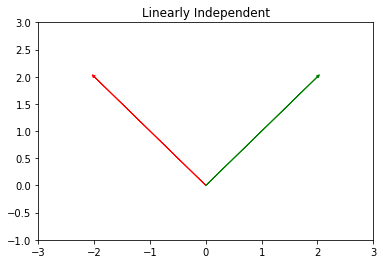

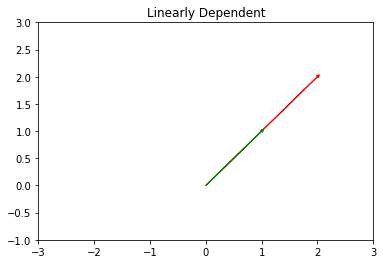

In [21]:
import matplotlib.pyplot as plt

vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Independent")
plt.show()

vector_1 = [2, 2]
vector_2 = [1, 1]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Linearly Dependent")
plt.show()

## 5. Span

What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [24]:
print("since these two vectors are linearly dependent their span is the line that they lie on")
print("they span the line y=(1/2)x")
print("\n They Span the Real Numbers")

since these two vectors are linearly dependent their span is the line that they lie on
they span the line y=(1/2)x

 They Span the Real Numbers


What is the span of the following vectors $l, m, n$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [22]:
# to find the span of these vectors we must first find their rank:
# If we combine these mectors in a matrix whose row space is the above set of vectors 
# and then reduce to row-echelon form. We get the identity matrix

# Because the row-echelon form of the augmented matrix is the identity matrix (which is rank 3) 
# we know that these vectors span R^3

np.linalg.matrix_rank([[1,2,3],[-1,0,7],[4,8,2]])

3

## 6. Basis

Graph two vectors that form a basis for $\mathbb{R}^2$



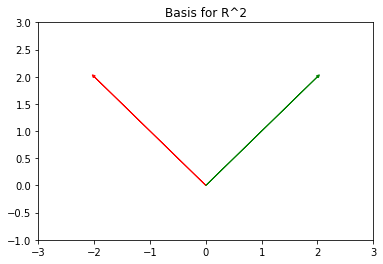

In [23]:
vector_1 = [-2, 2]
vector_2 = [2, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.title("Basis for R^2")
plt.show()

What does it mean to form a basis?

In [ ]:
# If two vectors are linearly independent then we know that these vectors can form a linear combination (scaled by some number and then composed together) to form any vector in a certain dimension of space. 

## 7. Rank

What is the Rank of the following matrix, P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
# We know from using an online calculator to reduce this matrix to row-echelon 
# form that its row-echelon form is the identity matrix which has 3 pivot values 
# (leading 1s) - therefore its rank is 3. 
import numpy as np

P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
rank = np.linalg.matrix_rank(P)
print(rank)

## 8. Linear Projections

Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

find $proj_{L}(w)$

graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Original Vector
v = [1,3] 
w = [-1,2]

numpy_v = np.array([1,3])
numpy_w = np.array([-1,2])
w_dot_v = np.dot(numpy_v, numpy_w)
v_dot_v = np.dot(numpy_v, numpy_v)
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

# proj = np.multiply(2.4,v)
# x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, projection[0], projection[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')


plt.title("non x-axis projection")
plt.show()

## Stretch Goal

For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

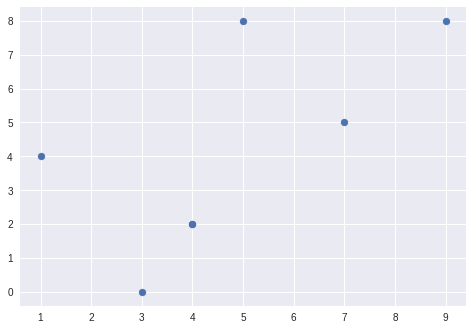

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()